In [2]:
from keras.datasets import fashion_mnist
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

##   Labels of the fashion_mnist dataset
####   0 T-shirt/top
####   1 Trouser
####   2 Pullover
####  3 Dress
####   4 Coat
####   5 Sandal
####   6 Shirt
####   7 Sneaker
####   8 Bag
####   9 Ankle boot

0

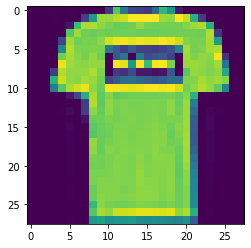

In [3]:
#Loading the fashion_mnist Dataset

(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()
plt.imshow(train_images[1])
train_labels[1]

In [4]:
#Normalizing the Data

train_images = train_images/255.0
test_images = test_images/255.0

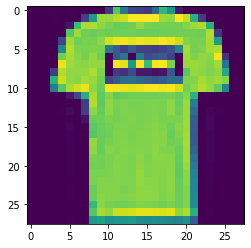

In [5]:
plt.imshow(train_images[1])

In [6]:
#Defining the model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["Accuracy"])
model.fit(train_images,train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4836 - Accuracy: 0.8268
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3664 - Accuracy: 0.8659
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3273 - Accuracy: 0.8798
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3047 - Accuracy: 0.8863
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2869 - Accuracy: 0.8925
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - Accuracy: 0.8981
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2626 - Accuracy: 0.9010
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - Accuracy: 0.9050
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2420 - Accuracy: 0.9087
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.233

In [8]:
#Evaluating the Test Data
    
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4100 - Accuracy: 0.8790


[0.4099777936935425, 0.8790000081062317]

In [9]:
#Predicting the first 10 images (Probability Distribution)

p = model.predict(test_images[:10])
p

array([[2.7407318e-17, 3.2994322e-14, 2.6590819e-19, 5.8372630e-20,
        2.9099579e-17, 1.0018014e-12, 5.3184434e-18, 9.0979296e-04,
        2.0600154e-18, 9.9909019e-01],
       [6.0987397e-04, 2.2412509e-15, 9.9687743e-01, 5.2807086e-13,
        2.4307615e-03, 1.5455881e-11, 8.1839178e-05, 5.0891774e-18,
        6.9539795e-12, 5.1650705e-15],
       [3.7203694e-24, 1.0000000e+00, 5.2162814e-34, 1.5719286e-18,
        6.7676602e-22, 7.5931195e-34, 6.5809738e-21, 0.0000000e+00,
        4.4884392e-26, 0.0000000e+00],
       [4.9018642e-21, 1.0000000e+00, 9.6805499e-30, 3.6581968e-15,
        1.6287027e-18, 1.2211062e-29, 1.3281679e-18, 3.7143943e-34,
        1.1928007e-22, 2.8253864e-33],
       [9.0247996e-02, 3.3494277e-12, 1.2918365e-05, 1.8114034e-06,
        1.5841639e-05, 8.6632418e-10, 9.0972066e-01, 9.0221441e-12,
        7.9322183e-07, 3.4797352e-11],
       [5.0134641e-19, 1.0000000e+00, 8.0803732e-25, 6.8367809e-16,
        2.9414725e-16, 7.0717969e-32, 3.1241656e-16, 9.86

In [10]:
pred = np.argmax(p,axis=1)
print(pred)
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


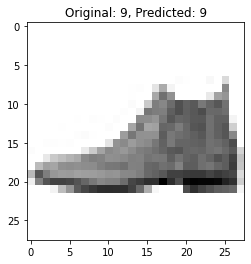

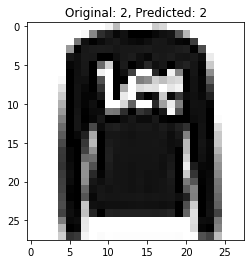

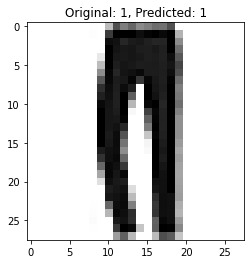

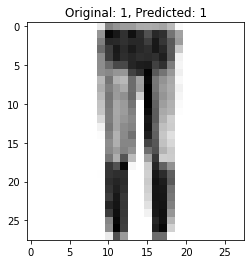

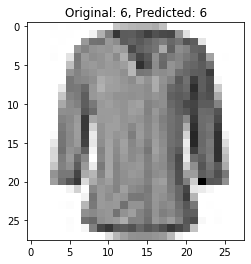

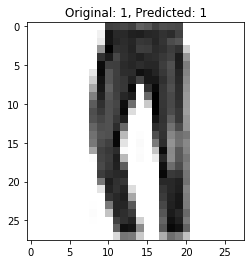

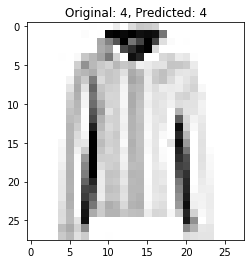

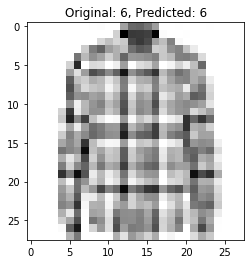

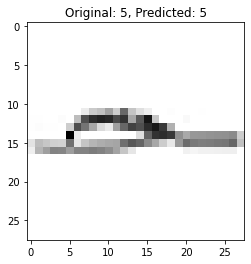

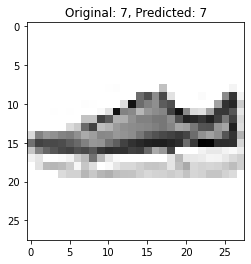

<Figure size 432x288 with 0 Axes>

In [11]:
#Visualizing the Originial and Predicted result
for i in range (10):
    plt.imshow(test_images[i], cmap="binary")
    plt.title(f"Original: {test_labels[i]}, Predicted: {pred[i]}")
    plt.axis("on")
    plt.figure()